# Creating a Sacramento Housing Dataset

In [101]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from xml.etree import ElementTree

## Using Kaggle Zillow datasets

In [9]:
index_df = pd.read_csv("price.csv")
sqft_df = pd.read_csv("pricepersqft.csv")
shp_file = 'ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp'  #shapefile
cities = gpd.read_file(shp_file)

In [181]:
sac_indices = index_df[index_df["County"] == "Sacramento"]
year_indices = sac_indices.iloc[:,6:].values
sac_indices.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
34,20288,Sacramento,Sacramento,Sacramento,CA,35,1295.0,1292.0,1284.0,1273.0,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504
169,17950,Elk Grove,Sacramento,Sacramento,CA,170,1581.0,1571.0,1566.0,1571.0,...,1752,1764,1773,1780,1785,1791,1794,1794,1795,1801
433,51414,Citrus Heights,Sacramento,Sacramento,CA,434,1315.0,1319.0,1311.0,1300.0,...,1454,1465,1476,1486,1494,1499,1503,1509,1520,1531
464,396020,Arden-Arcade,Sacramento,Sacramento,CA,465,1348.0,1352.0,1350.0,1343.0,...,1511,1523,1534,1545,1554,1564,1572,1581,1589,1597
545,11462,Folsom,Sacramento,Sacramento,CA,546,1718.0,1743.0,1762.0,1781.0,...,2079,2093,2102,2110,2125,2146,2171,2191,2198,2198


In [182]:
sac_sqft = sqft_df[sqft_df["County"] == "Sacramento"]
sac_sqft.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
34,20288,Sacramento,Sacramento,Sacramento,CA,35,0.918,0.926,0.928,0.930,...,1.074,1.082,1.088,1.094,1.100,1.104,1.108,1.112,1.114,1.118
170,17950,Elk Grove,Sacramento,Sacramento,CA,171,0.802,0.798,0.798,0.804,...,0.896,0.902,0.906,0.908,0.910,0.914,0.918,0.920,0.922,0.926
435,51414,Citrus Heights,Sacramento,Sacramento,CA,436,0.908,0.910,0.908,0.912,...,1.038,1.044,1.050,1.054,1.058,1.064,1.070,1.078,1.084,1.088
466,396020,Arden-Arcade,Sacramento,Sacramento,CA,467,0.924,0.938,0.952,0.964,...,1.142,1.152,1.162,1.170,1.176,1.180,1.186,1.196,1.202,1.210
545,11462,Folsom,Sacramento,Sacramento,CA,546,0.880,0.894,0.904,0.914,...,1.070,1.076,1.080,1.088,1.096,1.106,1.114,1.122,1.126,1.128


In [20]:
sac_shapes = cities[cities["County"] == "Sacramento"]
sac_shapes.tail()

,City,County,Name,RegionID,State,geometry
1993,Rancho Cordova,Sacramento,Mather Business,762808,CA,POLYGON ((-121.2882022429999 38.56740828300008...
1994,Rancho Cordova,Sacramento,South White Rock,762810,CA,POLYGON ((-121.2861192459999 38.58565901500003...
2018,Elk Grove,Sacramento,Laguna Riviera,763510,CA,"POLYGON ((-121.417685831 38.40898164200007, -1..."
2033,Folsom,Sacramento,Empire Ranch,763978,CA,"POLYGON ((-121.105591 38.689261, -121.105248 3..."
2034,Folsom,Sacramento,Natoma Station,763980,CA,POLYGON ((-121.1826302759999 38.65051391300005...


In [70]:
new_df = pd.merge(sac_shapes, sac_indices, how='inner', on="City")
new_df.head()

,City,County_x,Name,RegionID,State_x,geometry,City Code,Metro,County_y,State_y,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,Sacramento,Sacramento,Ben Ali,113717,CA,POLYGON ((-121.4196499469228 38.62020901873095...,20288,Sacramento,Sacramento,CA,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504
1,Sacramento,Sacramento,Del Paso Heights,114654,CA,POLYGON ((-121.4301789124655 38.63469899868906...,20288,Sacramento,Sacramento,CA,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504
2,Sacramento,Sacramento,Foothill Farms,115122,CA,"POLYGON ((-121.363476 38.66830700000003, -121....",20288,Sacramento,Sacramento,CA,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504
3,Sacramento,Sacramento,Gardenland,115240,CA,POLYGON ((-121.4679949459999 38.60539002000007...,20288,Sacramento,Sacramento,CA,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504
4,Sacramento,Sacramento,North Highlands,46793,CA,POLYGON ((-121.3625319999999 38.67809800000003...,20288,Sacramento,Sacramento,CA,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504


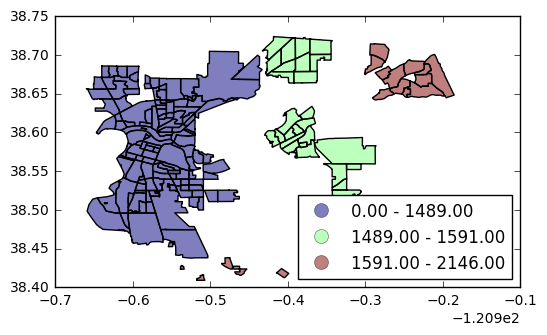

In [73]:
new_df.plot(column="September 2016", scheme='QUANTILES', legend=True)

#### Not granular enough. Want information by neighborhood, not city!

## Using Zillow API for neighborhood data in Sacramento

In [74]:
key = "X1-ZWz190jm9oqqkr_6ikyi"

In [123]:
url = "http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=" + key + "&state=ca&county=sacramento&childtype=neighborhood"
tree = ElementTree.fromstring(requests.get(url).content)
xml_obj = requests.get(url).content

In [132]:
import xmltodict

doc = xmltodict.parse(xml_obj)

In [133]:
doc

OrderedDict([(u'RegionChildren:regionchildren',
              OrderedDict([(u'@xsi:schemaLocation',
                            u'http://www.zillow.com/static/xsd/RegionChildren.xsd http://www.zillowstatic.com/vstatic/66a57db/static/xsd/RegionChildren.xsd'),
                           (u'@xmlns:xsi',
                            u'http://www.w3.org/2001/XMLSchema-instance'),
                           (u'@xmlns:RegionChildren',
                            u'http://www.zillow.com/static/xsd/RegionChildren.xsd'),
                           (u'request',
                            OrderedDict([(u'state', u'ca'),
                                         (u'county', u'sacramento'),
                                         (u'childtype', u'neighborhood')])),
                           (u'message',
                            OrderedDict([(u'text',
                                          u'Request successfully processed'),
                                         (u'code', u'0')])),
        

In [160]:
region_list = doc[u'RegionChildren:regionchildren'][u'response'][u'list'][u'region']
region_list[0]

OrderedDict([(u'id', u'117224'),
             (u'name', u'Parkway'),
             (u'zindex',
              OrderedDict([(u'@currency', u'USD'), ('#text', u'160700')])),
             (u'url',
              u'http://www.zillow.com/local-info/CA-Sacramento/Parkway/r_117224/'),
             (u'latitude', u'38.506872'),
             (u'longitude', u'-121.448267')])

In [189]:
def extract_region_info(region):
    name = str(region[u'name'])
    lat = float(region[u'latitude'])
    lon = float(region[u'longitude'])
    
    if 'zindex' in region.keys():
        zindex = float(region[u'zindex']['#text'])
        return [name, zindex, lat, lon]
    else:
        return [name, None, lat, lon]

In [190]:
result = [extract_region_info(region) for region in region_list]

In [192]:
pd.DataFrame(result, columns=['Neighborhood', 'Zindex', 'Latitude', 'Longitude']).head()

,Neighborhood,Zindex,Latitude,Longitude
0,Parkway,160700.0,38.506872,-121.448267
1,North Highlands,158000.0,38.671322,-121.379914
2,Valley High-North Laguna,202800.0,38.456217,-121.433656
3,Meadowview,168000.0,38.475362,-121.483589
4,Pocket,348900.0,38.492156,-121.530803


# TODO: 
* Add more columns to the dataframe
* combine shapefile polygons and regionID
* add in crime data
* plot and visualize by neighborhood/zindex